Using `ggplot2` (Grammar of Graphics)
----

In addition to the `base` plotting facilites we have been using, R also has the `ggplot2` package that can be used to generate beutfiul graphs. We will only touch on a small subset of `ggplot2` capabiliites here.

**References**

- [R Graphics Cookbook](http://www.cookbook-r.com/Graphs/)

In [2]:
library(ggplot2)
library(grid)
library(gridExtra)

In [3]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.46,20.22,1,0,3,1


Chaining plotting functions
----

- ggplot()
- aes()
- geom_xxx()
- annotationa

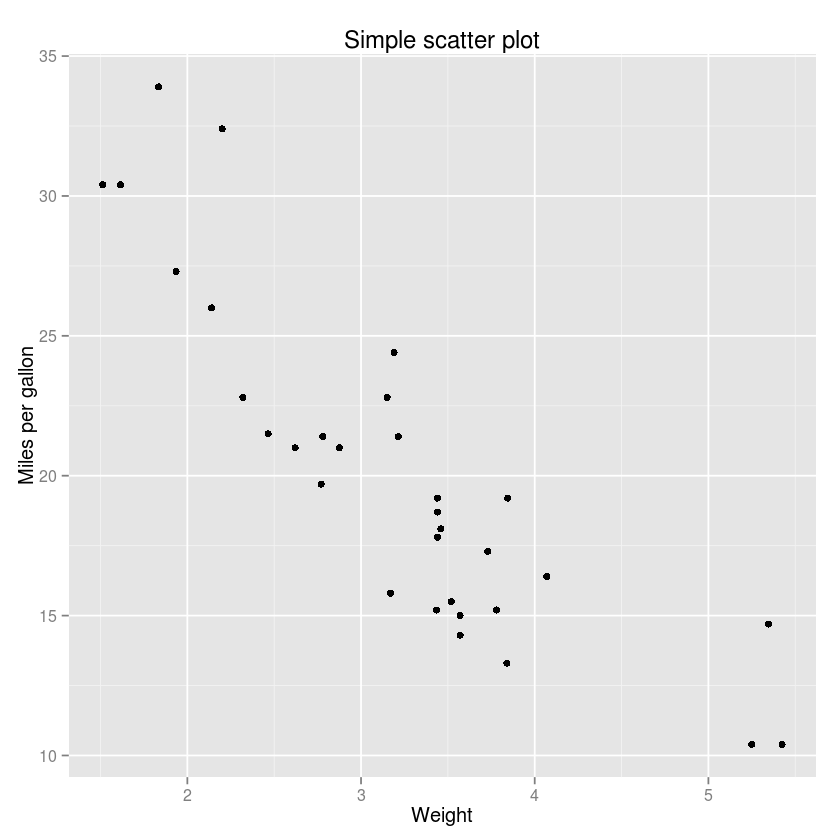

In [114]:
ggplot(data=mtcars, aes(x=wt, y=mpg)) +
geom_point() +
labs(title="Simple scatter plot", x="Weight", y="Miles per gallon")

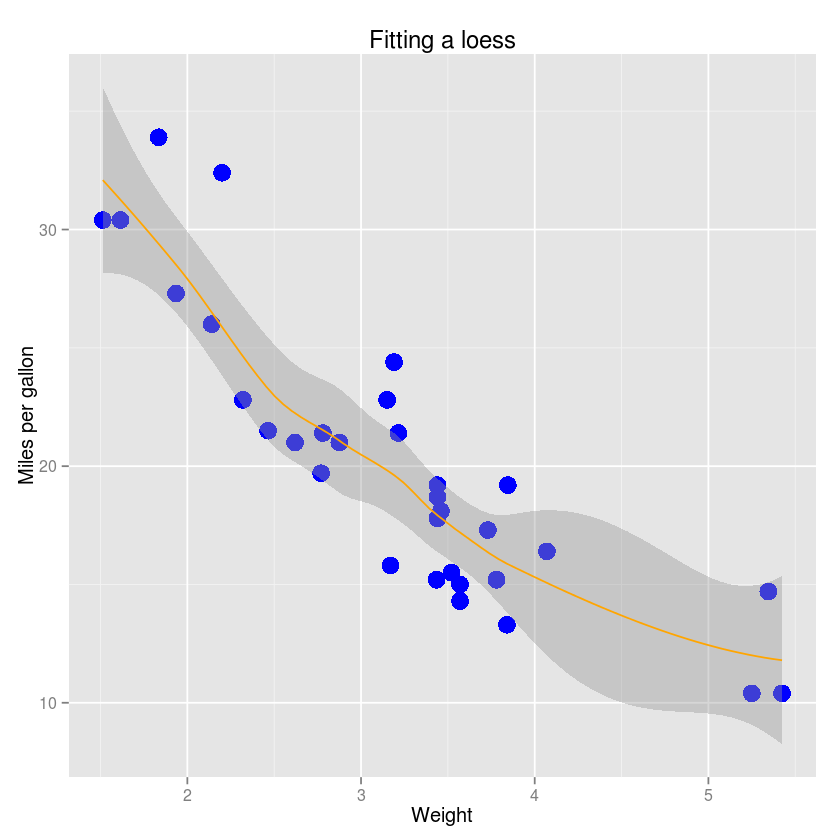

In [112]:
ggplot(data=mtcars, aes(x=wt, y=mpg)) +
geom_point(color="blue", size=5) +
geom_smooth(method="loess", color="orange") +
labs(title="Fitting a loess", x="Weight", y="Miles per gallon")

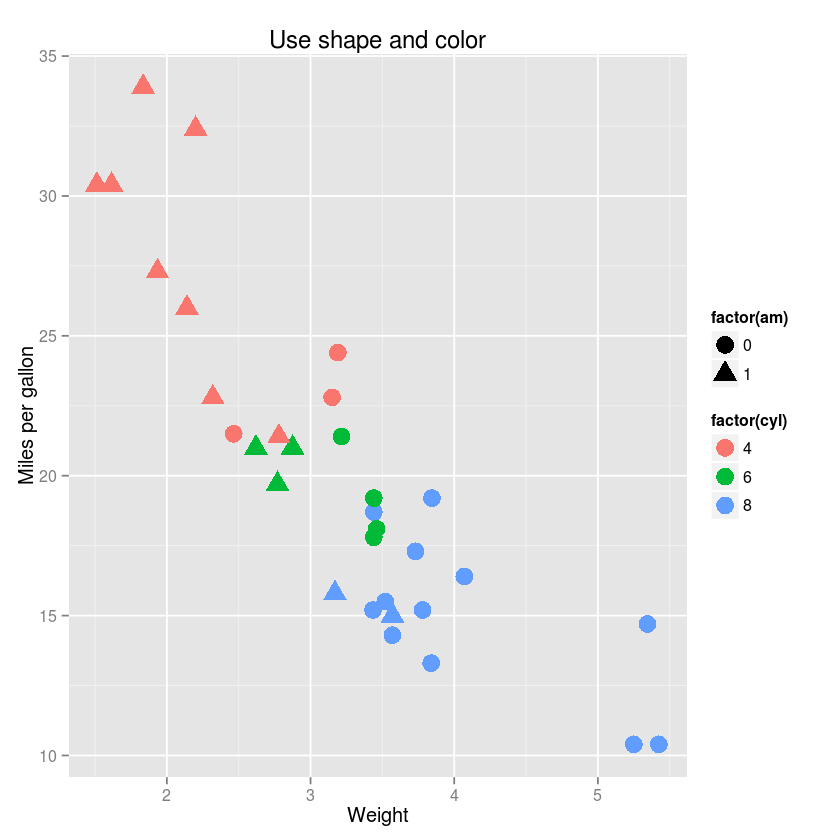

In [20]:
ggplot(data=mtcars, aes(x=wt, y=mpg, color=factor(cyl),, shape=factor(am))) +
geom_point(size=5) +
labs(title="Use shape and color", x="Weight", y="Miles per gallon")

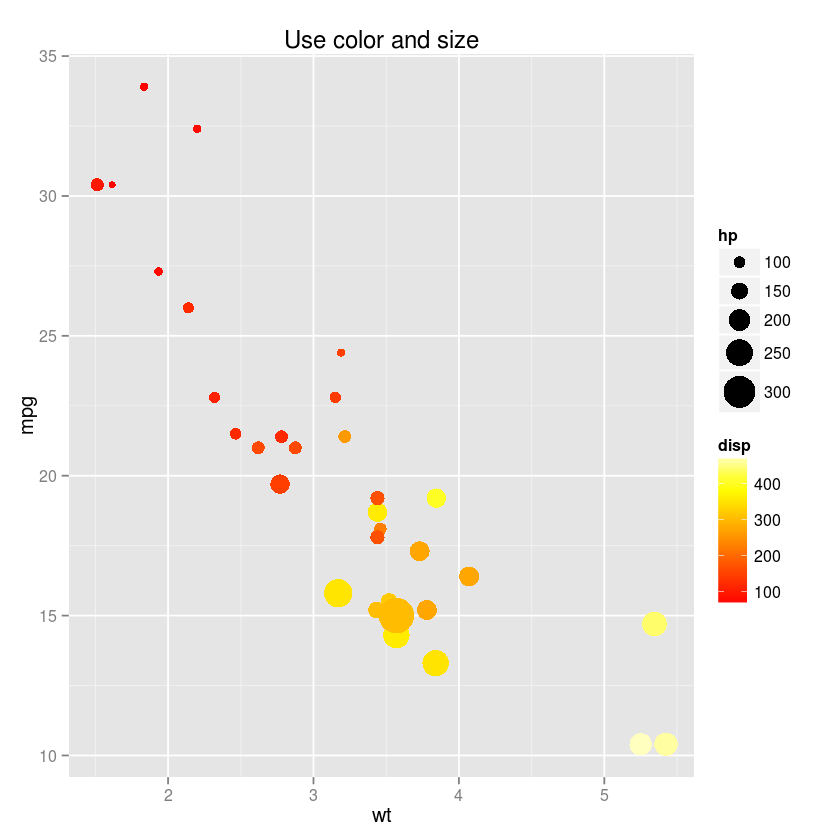

In [21]:
p <- ggplot(mtcars, aes(x=wt, y=mpg))
p + 
geom_point(aes(size=hp, color=disp)) + 
ggtitle("Use color and size") + 
scale_colour_gradientn(colours=heat.colors(10)) +
scale_size(range=c(2, 10))

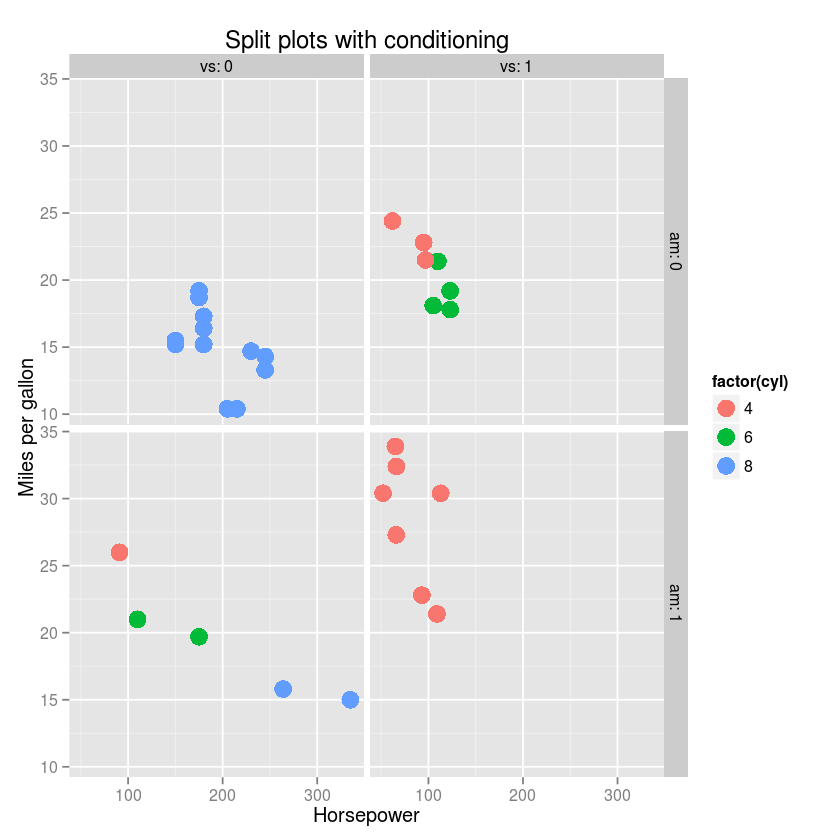

In [19]:
ggplot(data=mtcars, aes(x=hp, y=mpg, color=factor(cyl))) +
geom_point(size=5) +
facet_grid(am ~ vs, labeller = label_both) +
labs(title="Split plots with conditioning", x="Horsepower", y="Miles per gallon")

### More examples

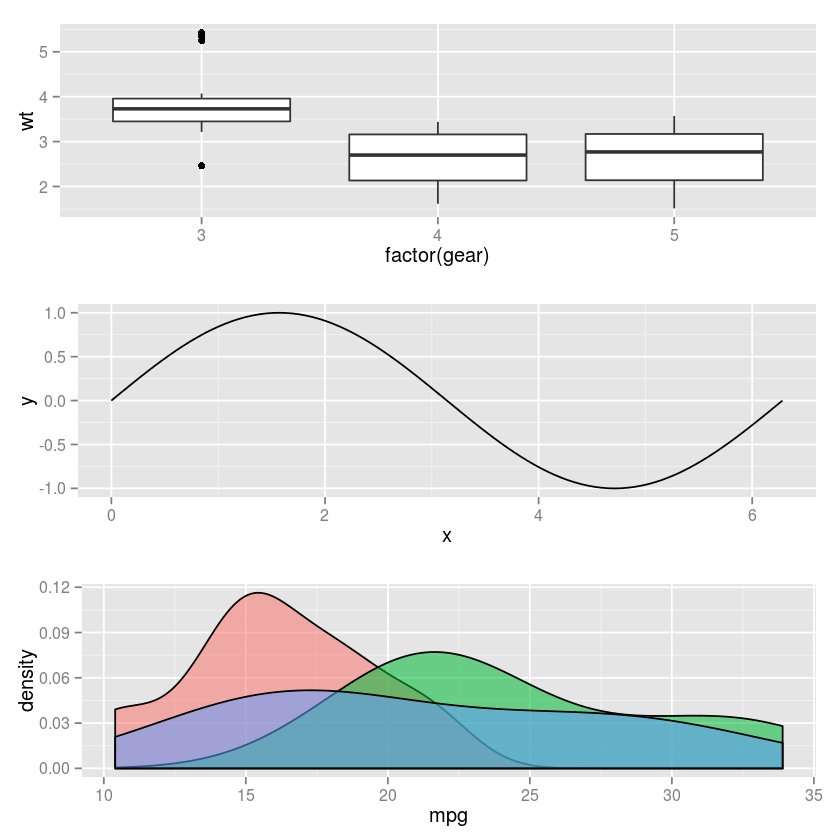

In [111]:
p4 <- ggplot(mtcars, aes(x=factor(gear), y=wt)) + 
      geom_boxplot()
p5 <- ggplot(data.frame(x=seq(0, 2*pi, length.out = 50)), aes(x=x)) + 
      stat_function(fun=sin, geom="line")
p6 <- ggplot(mtcars, aes(x=mpg, alpha=0.5, fill=factor(gear))) + 
      geom_density() +
      guides(alpha=FALSE, fill=FALSE)
grid.arrange(p4, p5, p6, ncol = 1)

### Plot aesthetics

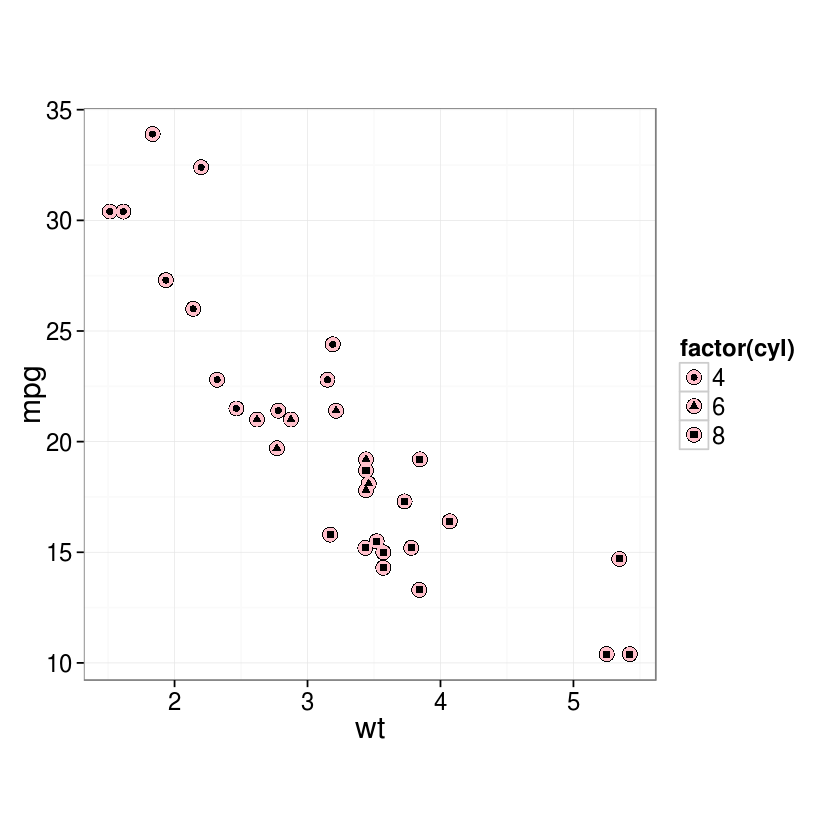

In [130]:
ggplot(mtcars, aes(x=wt, y=mpg)) +
geom_point(colour="black", size = 4.5, show_guide = TRUE) + 
geom_point(colour="pink", size = 4, show_guide = TRUE) +
geom_point(aes(shape = factor(cyl))) +
theme_bw(base_size=18) +
theme(aspect.ratio=1)

### Adding fitted lines

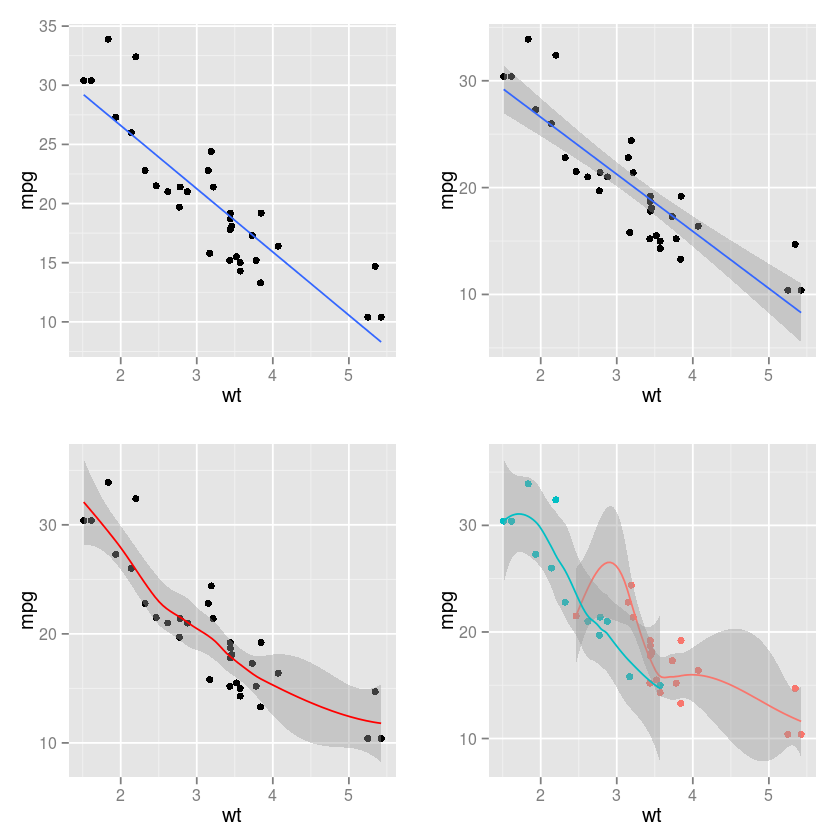

In [20]:
p <- ggplot(mtcars, aes(x=wt, y=mpg))
p1 <- p + 
      geom_point() + 
      stat_smooth(method=lm, se=FALSE)
p2 <- p + 
      geom_point() + 
      stat_smooth(method=lm, level=0.95)
p3 <- p + 
      geom_point() + 
      stat_smooth(method=loess, color='red')
p4 <- ggplot(mtcars, aes(x=wt, y=mpg, color=factor(am))) + 
      geom_point() + 
      geom_smooth(method='loess') + 
      guides(color=FALSE)
grid.arrange(p1, p2, p3, p4, ncol = 2)

#### Using existing model fits

In [14]:
m1 <- lm(mpg ~ wt, data=mtcars)
pred1 <- data.frame(wt=seq(min(mtcars$wt), max(mtcars$wt), length.out=100))
pred <- predict(m1, pred1, se.fit=TRUE)
pred1$mpg <- pred$fit
pred1$low <- pred1$mpg - 1.96*pred$se.fit
pred1$high <- pred1$mpg + 1.96*pred$se.fit

In [15]:
m2 <- loess(mpg ~ wt, data=mtcars)
pred2 <- data.frame(wt=seq(min(mtcars$wt), max(mtcars$wt), length.out=100))
pred2$mpg <- predict(m2, pred2)

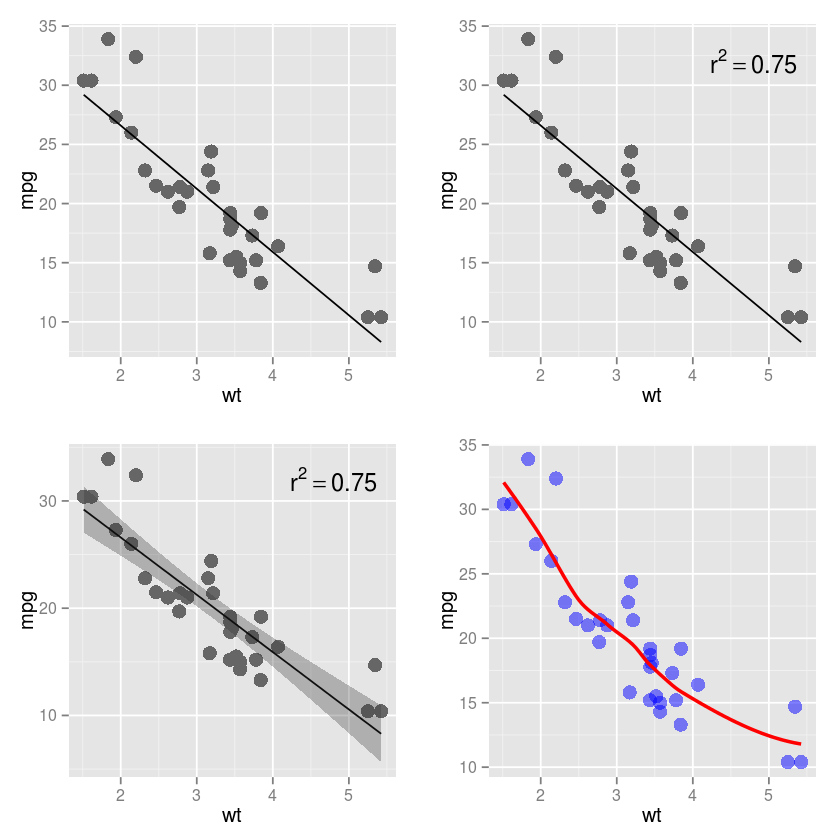

In [22]:
p <- ggplot(mtcars, aes(x=wt, y=mpg))
p1 <- p + 
      geom_point(size=4, color='gray40') + 
      geom_line(data=pred1)
p2 <- p + 
      geom_point(size=4, color='gray40') + 
      geom_line(data=pred1) +
      annotate("text", label="r^2 == 0.75", parse=TRUE, x=4.8, y=32)
p3 <- p + 
      geom_point(size=4, color='gray40') + 
      geom_line(data=pred1) +
      geom_ribbon(data=pred1, aes(ymin=low, ymax=high), alpha=0.3) +
      annotate("text", label="r^2 == 0.75", parse=TRUE, x=4.8, y=32)
p4 <- p + 
      geom_point(size=4, color='blue', alpha=0.5) + 
      geom_line(data=pred2, color='red', size=1)
grid.arrange(p1, p2, p3, p4, ncol = 2)

### Fitting a lgoistic

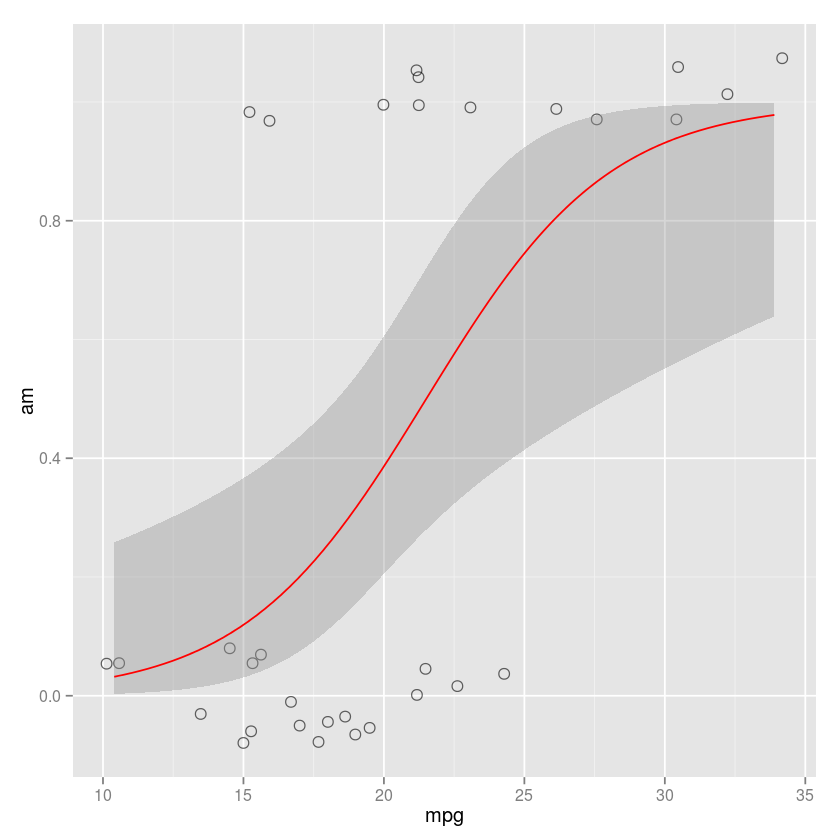

In [109]:
ggplot(mtcars, aes(x=mpg, y=am)) +
geom_point(position=position_jitter(width=.3, height=.08), shape=21, alpha=0.6, size=3) +
stat_smooth(method=glm, family=binomial, color="red") 